In [7]:
import numpy as np
import pandas as pd
from sklearn import tree
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, roc_curve, auc,accuracy_score
from sklearn.tree import DecisionTreeClassifier

### Reading Data in

In [9]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [11]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Exploration

In [12]:
train.shape, test.shape

((891, 12), (418, 11))

In [13]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [15]:
# stack train and test data to conduct preprecessing
full_df = pd.concat([train, test], axis=0, ignore_index=True, sort=False)
full_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [16]:
full_df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [17]:
full_df.Embarked.value_counts()

S    914
C    270
Q    123
Name: Embarked, dtype: int64

In [18]:
# Most people come from Southampton so try fill the na with this value
full_df.Embarked=full_df.Embarked.fillna('S')

In [21]:
# Drop Cabin Column: Too much Nan
full_df.drop(['Cabin'], axis = 1, inplace = True)

In [28]:
# Fill the age column with the mean age
full_df.Age=full_df.Age.fillna(full_df.Age.mean())

In [32]:
# Fill the fare column with the mean fare
full_df.Fare=full_df.Fare.fillna(full_df.Fare.mean())

In [34]:
# Define target 
target= train.Survived
target.shape

(891,)

In [36]:
full_df=full_df[['Age','Embarked','Fare','Parch','Pclass','Sex','SibSp']]

In [38]:
# Define training data set
train_df=full_df[:891]

In [40]:
train_df.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,S,7.2500,0,3,male,1
1,38.0,C,71.2833,0,1,female,1
2,26.0,S,7.9250,0,3,female,0
3,35.0,S,53.1000,0,1,female,1
4,35.0,S,8.0500,0,3,male,0


In [41]:
full_df['Sex'] = full_df['Sex'].map({'male': 1, 'female': 0})

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [46]:
full_df.SibSp.value_counts()

0    891
1    319
2     42
4     22
3     20
8      9
5      6
Name: SibSp, dtype: int64

In [48]:
full_df['Embarked'] = full_df['Embarked'].map({'C':0,'Q':1,'S':2})

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [51]:
full_df.head()

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,22.0,2,7.2500,0,3,1,1
1,38.0,0,71.2833,0,1,0,1
2,26.0,2,7.9250,0,3,0,0
3,35.0,2,53.1000,0,1,0,1
4,35.0,2,8.0500,0,3,1,0


In [56]:
import matplotlib.pyplot as plt

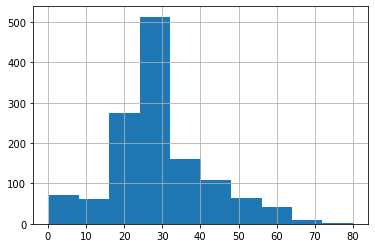

In [57]:
full_df.Age.hist()
plt.show()

In [58]:
full_df.Age.describe()

count    1309.000000
mean       29.881138
std        12.883193
min         0.170000
25%        22.000000
50%        29.881138
75%        35.000000
max        80.000000
Name: Age, dtype: float64

In [59]:
def get_age(age):
      
    if (age<=12):
        return 0
    elif (12<age<=18):
        return 1
    elif (18<age<=30):
        return 2
    elif (30<age<=60):
        return 3
    elif (60<age):
        return 4

In [60]:
Age = full_df['Age']

In [63]:
full_df['Age']= np.array([get_age(x) for x in Age])

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [65]:
# optinal: Filter Fare into groups
full_df.Fare.describe()

count    1309.000000
mean       33.295479
std        51.738879
min         0.000000
25%         7.895800
50%        14.454200
75%        31.275000
max       512.329200
Name: Fare, dtype: float64

In [66]:
def get_fare(fare):
      
    if (fare<=8):
        return 0
    elif (8<fare<=14):
        return 1
    elif (14<fare<=31):
        return 2
    elif (31<fare):
        return 3
  

In [67]:
Fare=full_df.Fare

In [68]:
full_df['Fare']= np.array([get_fare(x) for x in Fare])

c:\program files\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [69]:
full_df.head(3)

,Age,Embarked,Fare,Parch,Pclass,Sex,SibSp
0,2,2,0,0,3,1,1
1,3,0,3,0,1,0,1
2,2,2,0,0,3,0,0


In [70]:
full_df.Fare.value_counts()

0    360
2    336
3    331
1    282
Name: Fare, dtype: int64

In [71]:
# update training data set
train_df=full_df[:891]

In [72]:
x = train_df
y = train["Survived"]

### Modeling

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=.2,random_state=1)

In [74]:
print(x_train.shape,x_test.shape)

(712, 7) (179, 7)


### Building the Model: 3 steps Define, fit, predict

In [75]:
clf = DecisionTreeClassifier(random_state=2018)

In [76]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=2018, splitter='best')

In [77]:
predictions=clf.predict(x_test)

### Evaluation

In [78]:
confusion_matrix(y_test, predictions)

array([[92, 14],
       [28, 45]], dtype=int64)

In [79]:
accuracy_score(y_test,predictions)

0.7653631284916201

### Parameter Tuning

In [80]:
clf_1=DecisionTreeClassifier(max_depth=5)

In [81]:
clf_1.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [82]:
predictions_1=clf_1.predict(x_test)

In [83]:
accuracy_score(y_test,predictions_1)

0.776536312849162

In [84]:
clf_2=DecisionTreeClassifier(max_depth=5, min_impurity_decrease=0.1)

In [85]:
clf_2.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.1, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [86]:
predictions_2=clf_2.predict(x_test)

In [87]:
accuracy_score(y_test,predictions_2)

0.776536312849162

### Predict Test data

In [88]:
test_df = full_df[891:]
test_df.shape

(418, 7)

In [90]:
result = clf_2.predict(test_df)
result

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,